In [251]:
#Create the images to use in a schematic
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy
from scipy import interpolate
import pandas as pd
import random as r
import geopandas as gpd
import os
import earthpy as et

#go to folder to save the figs into
os.chdir(os.path.join(et.io.HOME, 'Documents', 'Python_Scripts', 'PROJECT','gsa_schematic_plots'))

#create the dummy data to be used
x_coords = np.arange(-15, 16)
y_coords = np.arange(-15, 16)
X_coords ,Y_coords = np.meshgrid(x_coords ,y_coords)
x = X_coords.reshape((np.prod(X_coords.shape),))
y = Y_coords.reshape((np.prod(Y_coords.shape),))

a0 = 5
x0 = 0
y0 = 0
phi = np.deg2rad(45)
ax = 7
ay = 5

def SUHIfunc(Z,a0,x0,y0,phi,ax,ay):
    x,y = Z
    return a0 * np.exp(((-((x-x0)*np.cos(phi)+(y-y0)*np.sin(phi))**2)/(0.5*(ax**2)))
                       -((((y-y0)*np.cos(phi)-(x-x0)*np.sin(phi))**2)/(0.5*(ay**2))))

SUHI_ideal = SUHIfunc((x,y),a0,x0,y0,phi,ax,ay)

#set LST to be 285 plus a random value between 0 and 1 plus the SUHI
for i in range(len(SUHI_ideal)):
    LST[i] = 285 + SUHI_ideal[i] + r.randint(0,100)/100

#create dataframe with the dummy data
temp = {'x':x, 'y':y, 'LST':LST}
df = pd.DataFrame(data = temp)

#create the urban flag (randomly chosen to look like a city area)
df['urban_flag'] = 0

df.loc[(df.x > -6) & (df.x < 6) & (df.y > -6) & (df.y < 6),'urban_flag'] = 1

df.loc[(df.x > 2) & (df.x < 7) & (df.y > 4) & (df.y < 8), 'urban_flag'] = 1

df.loc[(df.x > -6) & (df.x < -1) & (df.y > -9) & (df.y < -3), 'urban_flag'] = 1

df.loc[(df.x > 3) & (df.x < 7) & (df.y > -2) & (df.y < 5), 'urban_flag'] = 1



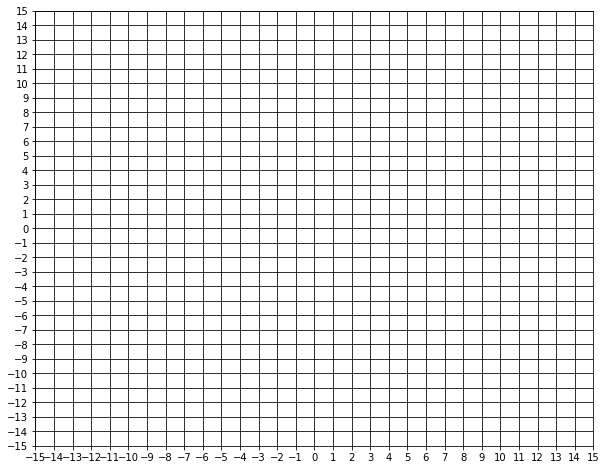

In [288]:
fig = plt.figure(figsize=(10, 8))
plt.rc('grid', linestyle="-", color='black')
plt.grid(True)
plt.xticks(range(-15,16))
plt.yticks(range(-15,16))

plt.savefig('empty_grid.png')

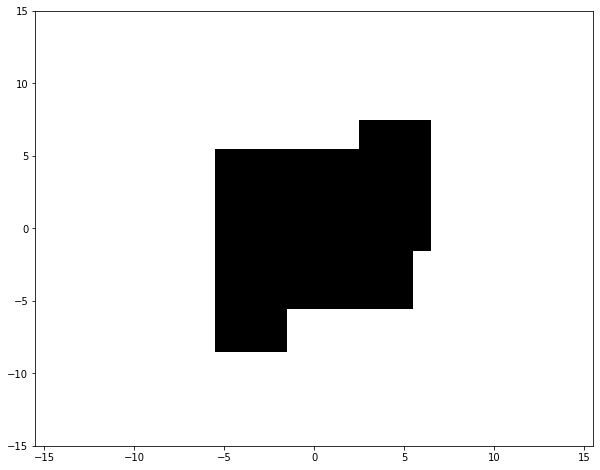

In [266]:
#urban area
fig = plt.figure(figsize=(10, 8))
ax=plt.gca()

#get the points into the correct format
X ,Y = np.meshgrid(x ,y)
Z = scipy.interpolate.griddata((x, y), df.urban_flag.values, (X,Y), method='nearest')

c = ax.pcolormesh(X,Y, Z, cmap = 'binary', shading = 'auto')
#fig.colorbar(c, ax=ax)

plt.savefig('urban_flags.png')

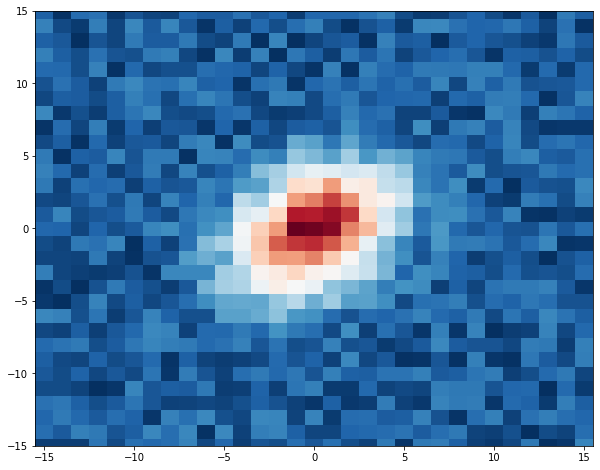

In [256]:
#LST
fig = plt.figure(figsize=(10, 8))
ax=plt.gca()

#get the points into the correct format
X ,Y = np.meshgrid(x ,y)
Z = scipy.interpolate.griddata((x, y), LST, (X,Y), method='nearest')

c = ax.pcolormesh(X,Y, Z, cmap ='RdBu_r', shading = 'auto')
#fig.colorbar(c, ax=ax)
plt.savefig('LST.png')

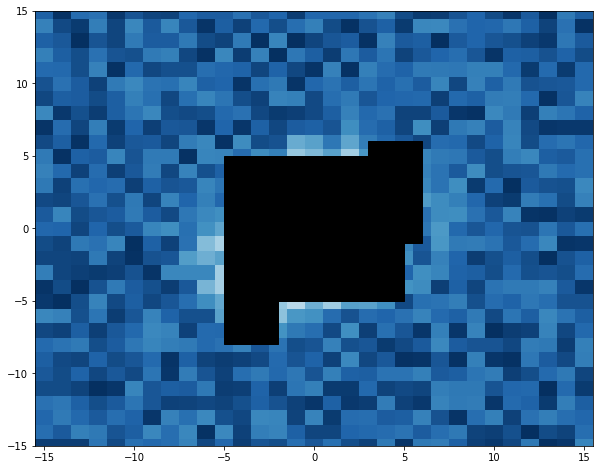

In [258]:
#T0

fig, ax = plt.subplots(nrows=1, ncols = 1, figsize = (10, 8))
#get the points into the correct format
x = df.x.values
y = df.y.values
LST = df.LST.values
X ,Y = np.meshgrid(x ,y)
Z = scipy.interpolate.griddata((x, y), LST, (X,Y), method='nearest')

ax.pcolormesh(X,Y, Z, cmap ='RdBu_r', shading = 'auto', vmin=np.nanmin(LST), vmax = np.nanmax(LST))
#fig.colorbar(c, ax=ax)

#add city rectanges

rect1 = mpatches.Rectangle((-5, -5), 10, 10, angle = 0, fill = True ,edgecolor='k', facecolor = 'k')
ax.add_patch(rect1)

rect2 = mpatches.Rectangle((3, 4), 3, 2, angle = 0, fill = True ,edgecolor='k', facecolor = 'k')
ax.add_patch(rect2)

rect3 = mpatches.Rectangle((4, -1), 2, 5, angle = 0, fill = True ,edgecolor='k', facecolor = 'k')
ax.add_patch(rect3)

rect4 = mpatches.Rectangle((-5, -8), 3, 4, angle = 0, fill = True ,edgecolor='k', facecolor = 'k')
ax.add_patch(rect4)

plt.savefig('rural_LST.png')

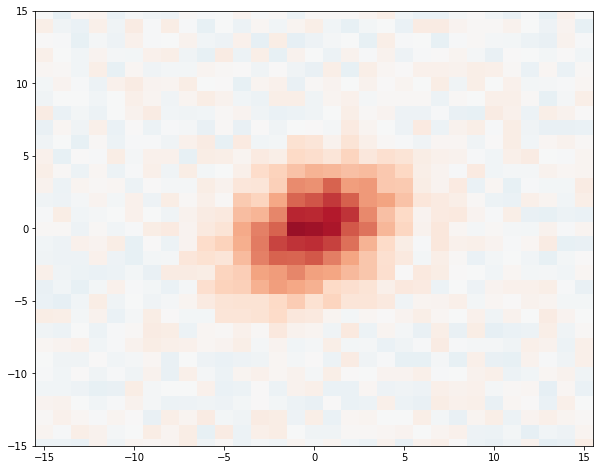

In [259]:
fig = plt.figure(figsize=(10, 8))
ax=plt.gca()
t0 = df[df['urban_flag'] == 0]['LST'].mean()
df['SUHI'] = df['LST'] - t0

#get the points into the correct format
SUHI = df.SUHI.values
X ,Y = np.meshgrid(x ,y)
Z = scipy.interpolate.griddata((x, y), SUHI, (X,Y), method='nearest')

c = ax.pcolormesh(X,Y, Z, cmap ='RdBu_r', vmin=-6, vmax=6, shading = 'auto')
#fig.colorbar(c, ax=ax)

plt.savefig('SUHI.png')

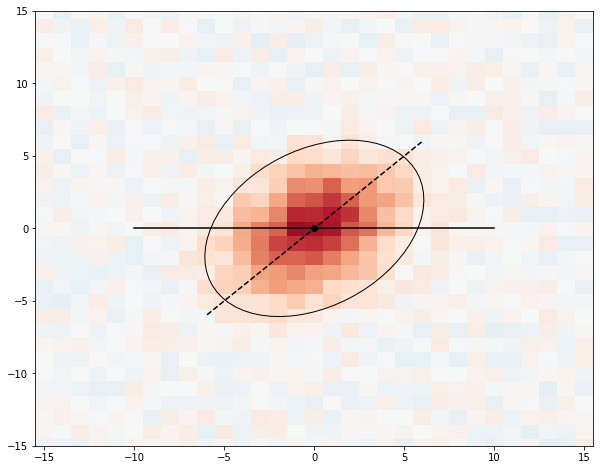

In [261]:
fig = plt.figure(figsize=(10, 8))
ax= plt.gca()

SUHI = df.SUHI.values
X ,Y = np.meshgrid(x ,y)
Z = scipy.interpolate.griddata((x, y), SUHI, (X,Y), method='nearest')

c = ax.pcolormesh(X,Y, Z, cmap ='RdBu_r', vmin=-6, vmax=6, shading = 'auto')
#fig.colorbar(c, ax=ax)

a0 = 5
x0 = 0
y0 = 0
phi = np.deg2rad(45)
a_x = 7
a_y = 5

ax.plot(x0,y0,'ko') 
ellipse_outer = mpatches.Ellipse((x0,y0), 2*a_x, 2*a_y, angle=45, fill=False, label = 'Extent', edgecolor = 'k')
ax.add_patch(ellipse_outer)


xvals = [-6, 6]
yvals = [-6, 6]

ax.plot(corner1, corner2, 'k', linestyle = 'dashed')
ax.plot([-10, 10], [0,0], 'k')

plt.savefig('gsa_fit.png')

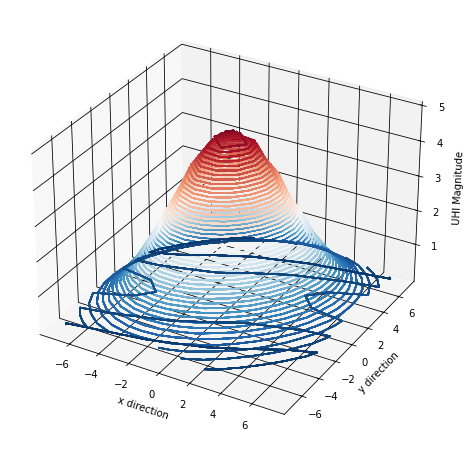

In [319]:
#create a 3d plot
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 8))
ax=plt.axes(projection = '3d')

#get the points into the correct format
#take only the extent of the SUHI
df['SUHI_ideal'] = SUHI_ideal
city_SUHI = df.loc[(df.x > -8) & (df.x < 8) & (df.y > -8) & (df.y < 8)].SUHI_ideal.values
city_x = df.loc[(df.x > -8) & (df.x < 8) & (df.y > -8) & (df.y < 8)].x.values
city_y = df.loc[(df.x > -8) & (df.x < 8) & (df.y > -8) & (df.y < 8)].y.values

X ,Y = np.meshgrid(city_x ,city_y)
Z = scipy.interpolate.griddata((city_x, city_y), city_SUHI, (X,Y), method='nearest')

c = ax.contour3D(X,Y, Z, 50, cmap ='RdBu_r')
ax.set_xlabel('x direction')
ax.set_ylabel('y direction')
ax.set_zlabel('UHI Magnitude')

plt.savefig('3d_gsa_fit.png')